In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [6]:
data = pd.read_csv("/content/drive/MyDrive/tested.csv")
df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df = df.drop(columns=['Cabin','Name','Parch','Ticket','Embarked','PassengerId','SibSp'])
df


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875
...,...,...,...,...,...
413,0,3,male,NaN,8.0500
414,1,1,female,39.0,108.9000
415,0,3,male,38.5,7.2500
416,0,3,male,NaN,8.0500


In [8]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,86
Fare,1


In [9]:
df=df.dropna()
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


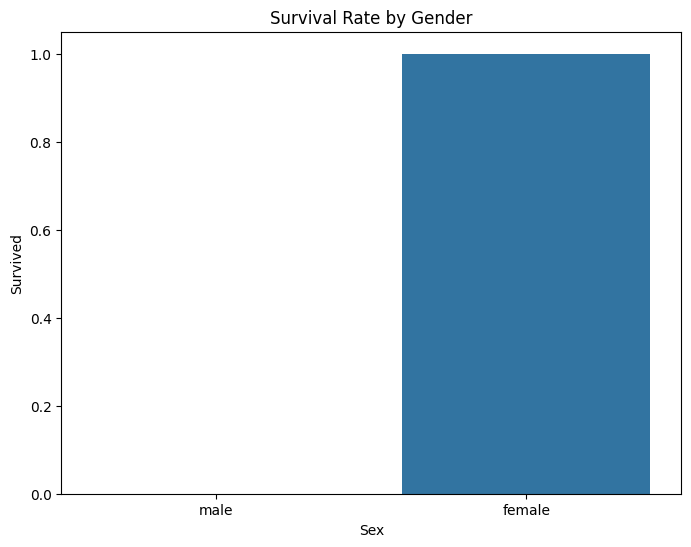

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

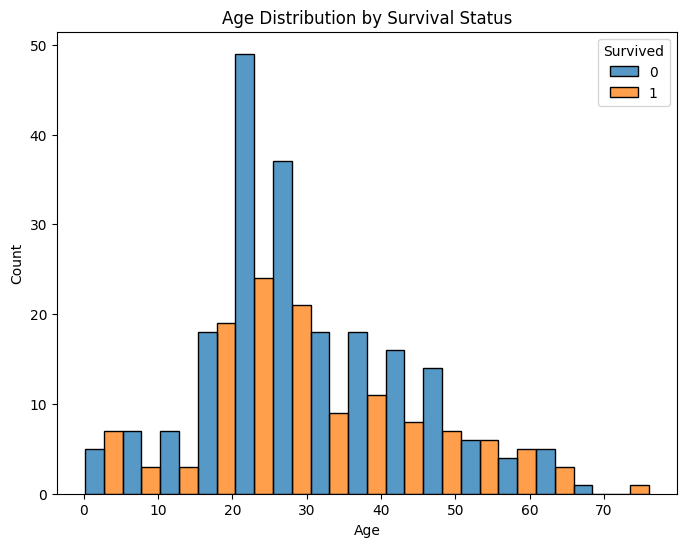

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='Survived', multiple='dodge', kde=False)
plt.title('Age Distribution by Survival Status')
plt.show()

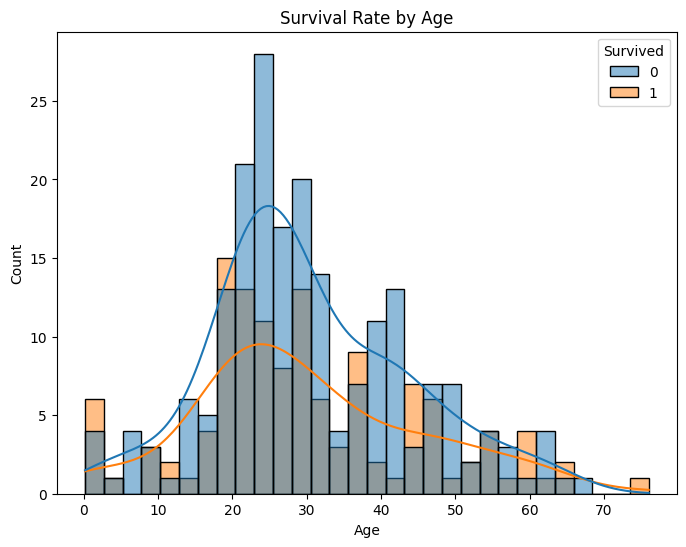

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Survival Rate by Age')
plt.show()

In [15]:
df.describe()

,Survived,Pclass,Age,Fare
count,331.000000,331.000000,331.000000,331.000000
mean,0.383686,2.141994,30.181269,40.982087
std,0.487019,0.846251,14.104573,61.228558
min,0.000000,1.000000,0.170000,0.000000
25%,0.000000,1.000000,21.000000,8.050000
50%,0.000000,2.000000,27.000000,16.000000
75%,1.000000,3.000000,39.000000,40.633350
max,1.000000,3.000000,76.000000,512.329200


In [16]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

<ipython-input-16-0e8a6067f16b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})


In [17]:
input = df[['Age','Sex','Pclass','Fare']]
output = df['Survived']

In [18]:
input = df[['Age','Sex','Pclass','Fare']]
output = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2,random_state=42)

In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [21]:
new_data = pd.DataFrame({
    'Age': [40],
    'Sex': [1],
    'Pclass': [3],
    'Fare': [71.2833]
})

prediction = model.predict(new_data)

if prediction == 1:
    print("You will survive")
else:
    print("You will not survive")


You will not survive
